<font color="#CC3D3D"><p>
# Feature Engineering

Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.    
*- Andrew Ng, Machine Learning and AI via brain simulations -*
<img align="left" src="http://drive.google.com/uc?export=view&id=1DxffnM22lRGsrf1wI28QLgd6YG9yOa3n" width=800 height=600>

<font color="darkgreen"><p>   
#### Scikit-Learn Preprocessor Interface      
① Import the preprocessor   
② Instantiate the preprocessor   
③ Fit the data to the preprocessor: .fit()   
④ Generate the preprocessed data: .transform()   

* [Handling Missing Values](#1.-Handling-Missing-Values)
* [Handling Categorical Variables](#2.-Handling-Categorical-Variables)
* [Feature Scaling](#3.-Feature-Scaling)
* [Feature Selection](#4.-Feature-Selection)
* [Feature Generation](#5.-Feature-Generation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 30) # 열이 30개 보이도록 설정

**[Allstate Purchase Prediction Challenge](https://www.kaggle.com/c/allstate-purchase-prediction-challenge/data)**
- 고객이 자동차 보험상품을 구매하기까지의 transaction 기록 
- 각 customer ID 별로 quote history 포함
- 각 customer ID 별 마지막 행이 구매 포인트 (record_type=1)

*Variable Descriptions*
- customer_ID
- shopping_pt - Unique identifier for the shopping point of a given customer
- record_type - 0=shopping point, 1=purchase point
- day - Day of the week (0-6, 0=Monday)
- time - Time of day (HH:MM)
- state - State where shopping point occurred
- location - Location ID where shopping point occurred
- group_size - How many people will be covered under the policy (1, 2, 3 or 4)
- homeowner - Whether the customer owns a home or not (0=no, 1=yes)
- car_age - Age of the customer’s car
- car_value - How valuable was the customer’s car when new
- risk_factor - An ordinal assessment of how risky the customer is (1, 2, 3, 4)
- age_oldest - Age of the oldest person in customer's group
- age_youngest - Age of the youngest person in customer’s group
- married_couple - Does the customer group contain a married couple (0=no, 1=yes)
- C_previous - What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
- duration_previous -  how long (in years) the customer was covered by their previous issuer
- A,B,C,D,E,F,G - the coverage options
- cost - cost of the quoted coverage options

In [2]:
all_data = pd.read_csv('../data/Allstate_train.csv')
all_data.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630


In [3]:
all_data.query('customer_ID == 10152724')

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
665243,10152724,1,0,3,13:42,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,0,0,3,3,0,0,2,642
665244,10152724,2,0,3,13:43,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,677
665245,10152724,3,0,3,13:43,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,677
665246,10152724,4,0,3,13:44,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,677
665247,10152724,5,0,3,13:46,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,685
665248,10152724,6,1,1,15:14,KY,10204,1,1,1,d,NaN,20,20,0,4.0,4.0,1,0,3,3,0,2,2,681


In [4]:
# 구매 포인트인 데이터 포인트만 처리
data = all_data.query('record_type == 1').copy()

# 분석의 편의를 위해 사용할 속성을 범주형과 연속형으로 구분
con = ['group_size','car_age','age_oldest','age_youngest','duration_previous','cost'] # 수치형
cat = ['day','homeowner','car_value','risk_factor','married_couple','C_previous','state','shopping_pt'] # 범주형(수치이지만 범주형인 변수 포함)
data = data[con+cat]
data.head()

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,shopping_pt
8,2,2,46,42,2.0,634,0,0,g,3.0,1,1.0,IN,9
14,1,10,28,28,13.0,731,3,0,e,4.0,0,3.0,NY,6
22,1,11,43,43,4.0,602,4,0,c,NaN,0,2.0,PA,8
26,2,3,62,60,3.0,626,4,1,d,3.0,1,3.0,WV,4
32,1,5,32,28,2.0,614,1,0,d,3.0,1,1.0,MO,6


## 1. Handling Missing Values

##### Check missing values

In [5]:
data.isnull().sum() # 각 필드별 결측치 확인

group_size               0
car_age                  0
age_oldest               0
age_youngest             0
duration_previous      836
cost                     0
day                      0
homeowner                0
car_value              432
risk_factor          34346
married_couple           0
C_previous             836
state                 1019
shopping_pt              0
dtype: int64

### Drop (결측치가 있는 행을 제거)
- 결측치가 많다면 데이터손실의 위험이 크다
- 데이터가 많을 때 사용

In [6]:
data.shape

(97009, 14)

In [7]:
data_drop = data.dropna(subset=['state','car_value','risk_factor','C_previous','duration_previous']) 
data_drop.shape # subset에 적힌 column값에 대해서만 dropna를 진행

(61338, 14)

In [8]:
#결측값이 하나라도 있는 feature를 자동으로 없애고 싶을 때 아래 코드 사용:
#data.dropna(subset=data.isnull().sum()[data.isnull().sum().gt(0)].index.values) # gt: 크다, lt: 작다

In [9]:
data_drop.isnull().sum()

group_size           0
car_age              0
age_oldest           0
age_youngest         0
duration_previous    0
cost                 0
day                  0
homeowner            0
car_value            0
risk_factor          0
married_couple       0
C_previous           0
state                0
shopping_pt          0
dtype: int64

### Impute

##### Continuous feature의 결측값 대체
- 연속형과 범주형은 다르게 대체

In [10]:
data[con].isnull().sum()

group_size             0
car_age                0
age_oldest             0
age_youngest           0
duration_previous    836
cost                   0
dtype: int64

- 결측값이 있는 행을 출력

In [11]:
data[data['duration_previous'].isna()]['duration_previous']

377      NaN
450      NaN
1044     NaN
1828     NaN
2152     NaN
          ..
661737   NaN
662523   NaN
662699   NaN
662853   NaN
665003   NaN
Name: duration_previous, Length: 836, dtype: float64

Method-1: Univariate Imputation (단변량)

- 독립적으로 비어있는 각각의 결측치를 채우기

In [12]:
from sklearn.impute import SimpleImputer 

imputer_con = SimpleImputer(strategy="median") # 중앙값으로 결측치를 대체
imputer_con.fit(data[con])

SimpleImputer(strategy='median')

- strategy="mean": 평균 대체
- strategy="median": 중위수 대체
- strategy="most_frequent":최빈값 대체

In [13]:
data['duration_previous'].median()

5.0

In [14]:
imputer_con.transform(data[con]) # 기본적으로 저장이 numpy의 array형태로 저장

array([[  2.,   2.,  46.,  42.,   2., 634.],
       [  1.,  10.,  28.,  28.,  13., 731.],
       [  1.,  11.,  43.,  43.,   4., 602.],
       ...,
       [  1.,   8.,  23.,  23.,   5., 716.],
       [  1.,   0.,  39.,  39.,   7., 651.],
       [  1.,   1.,  20.,  20.,   4., 681.]])

In [15]:
data_imp = data.copy()
data_imp[con] = imputer_con.transform(data[con]) # 저장을 해야 dataframe / array는 컬럼명이 사라짐

In [16]:
# 결측값이 중위값으로 바뀐 것 확인 
data_imp.loc[data[data['duration_previous'].isna()].index]['duration_previous']

377       5.0
450       5.0
1044      5.0
1828      5.0
2152      5.0
         ... 
661737    5.0
662523    5.0
662699    5.0
662853    5.0
665003    5.0
Name: duration_previous, Length: 836, dtype: float64

Method-2: Multivariate Imputation (다변량)

In [17]:
from sklearn.experimental import enable_iterative_imputer  # still experimental 
from sklearn.impute import IterativeImputer

data_imp = data.copy()
data_imp[con] = IterativeImputer(max_iter=10, random_state=0).fit_transform(data[con])

In [18]:
data_imp.loc[data[data['duration_previous'].isna()].index]['duration_previous']

377       4.742801
450       5.407067
1044      7.685823
1828      4.160533
2152      4.628841
            ...   
661737    6.011405
662523    4.300583
662699    5.674572
662853    7.360666
665003    6.489347
Name: duration_previous, Length: 836, dtype: float64

##### Categorical feature 의 결측값 대체 -최빈값으로 대체

In [19]:
data_imp[cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97009 entries, 8 to 665248
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day             97009 non-null  int64  
 1   homeowner       97009 non-null  int64  
 2   car_value       96577 non-null  object 
 3   risk_factor     62663 non-null  float64
 4   married_couple  97009 non-null  int64  
 5   C_previous      96173 non-null  float64
 6   state           95990 non-null  object 
 7   shopping_pt     97009 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 8.7+ MB


- 학습데이터에만 fit_transform을 사용

In [20]:
data_imp[cat] = SimpleImputer(strategy="most_frequent").fit_transform(data_imp[cat])

In [21]:
data_imp[cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97009 entries, 8 to 665248
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day             97009 non-null  int64  
 1   homeowner       97009 non-null  int64  
 2   car_value       97009 non-null  object 
 3   risk_factor     97009 non-null  float64
 4   married_couple  97009 non-null  int64  
 5   C_previous      97009 non-null  float64
 6   state           97009 non-null  object 
 7   shopping_pt     97009 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 8.7+ MB


In [22]:
data[con]

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost
8,2,2,46,42,2.0,634
14,1,10,28,28,13.0,731
22,1,11,43,43,4.0,602
26,2,3,62,60,3.0,626
32,1,5,32,28,2.0,614
...,...,...,...,...,...,...
665225,2,1,75,75,15.0,628
665233,1,13,33,33,8.0,681
665239,1,8,23,23,5.0,716
665242,1,0,39,39,7.0,651


- 결측값은 결측값인 이유가 있다. 너무 신경쓰지는 말되, 처리를 해야한다.

<font color='blue'><p>
다른 결측값 처리 방법을 알고 싶으면 아래 자료를 참조:  
- [6 Different Ways to Compensate for Missing Values In a Dataset](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)

## 2. Handling Categorical Variables

In [23]:
data_imp[cat].head()

,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,shopping_pt
8,0,0,g,3.0,1,1.0,IN,9
14,3,0,e,4.0,0,3.0,NY,6
22,4,0,c,3.0,0,2.0,PA,8
26,4,1,d,3.0,1,3.0,WV,4
32,1,0,d,3.0,1,1.0,MO,6


### One-Hot Encoding (더미변수)
- 범주형 숫자만큼 범주형 컬럼을 생성
- label encoding의 문제를 해결할 수 있다
- 범주가 너무 많으면 사용하기 힘들다.

In [24]:
data_imp['car_value']

8         g
14        e
22        c
26        d
32        d
         ..
665225    e
665233    g
665239    e
665242    g
665248    d
Name: car_value, Length: 97009, dtype: object

In [25]:
data_imp_ohe = data_imp.copy()
data_imp_ohe = pd.get_dummies(data_imp, columns=['car_value'])

In [26]:
data_imp_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97009 entries, 8 to 665248
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   group_size         97009 non-null  float64
 1   car_age            97009 non-null  float64
 2   age_oldest         97009 non-null  float64
 3   age_youngest       97009 non-null  float64
 4   duration_previous  97009 non-null  float64
 5   cost               97009 non-null  float64
 6   day                97009 non-null  int64  
 7   homeowner          97009 non-null  int64  
 8   risk_factor        97009 non-null  float64
 9   married_couple     97009 non-null  int64  
 10  C_previous         97009 non-null  float64
 11  state              97009 non-null  object 
 12  shopping_pt        97009 non-null  int64  
 13  car_value_a        97009 non-null  uint8  
 14  car_value_b        97009 non-null  uint8  
 15  car_value_c        97009 non-null  uint8  
 16  car_value_d        97

In [27]:
data_imp_ohe.filter(like='car').head() # column 이름에 car가 들어간 열을 필터링

,car_age,car_value_a,car_value_b,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i
8,2.0,0,0,0,0,0,0,1,0,0
14,10.0,0,0,0,0,1,0,0,0,0
22,11.0,0,0,1,0,0,0,0,0,0
26,3.0,0,0,0,1,0,0,0,0,0
32,5.0,0,0,0,1,0,0,0,0,0


### Label Encoding (범주형 -> 숫자 / A=1, B=2, C=3의 방식)
- 범주형을 숫자로 모델 enconding을 할 시에 왜곡된 결과를 초래할 수 있음
- 선형모델, 로지스틱회귀 등은 label encoding 사용 절대 불가
- DecisionTree류에는 label encoding 사용 가능

In [28]:
from sklearn.preprocessing import LabelEncoder

data_imp_ohe['state'] = LabelEncoder().fit_transform(data_imp_ohe['state'])
# data_imp_ohe['state'] = data_imp_ohe['state'].astype('category').cat.codes 

In [29]:
data_imp_ohe.filter(like='state').head()

,state
8,10
14,23
22,27
26,34
32,15


<font color='blue'><p>
이외 다양한 인코더를 범주형 속성에 적용할 수 있다. (아래 참조)  
- [All about Categorical Variable Encoding](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)
- [Mean Encoding 설명](https://dailyheumsi.tistory.com/120)
- [Category Encoders](https://github.com/scikit-learn-contrib/categorical-encoding)

- 최근에는 frequency encoding, target encoding(mean encoding) 이용
- 범주의 갯수가 많을 때 mean encoding을 자주 이용하는 추세
- sklearn은 새로운 트렌드에 비해 1-2년 정도 늦다.

## 3. Feature Scaling

<font color='darkgreen'><p>
### *The effect of preprocessing on supervised learning* #####
<img align='left' src='http://drive.google.com/uc?export=view&id=1BLGzg0t4WqgBo8BjQMGTymW1cTisLTlU'>   

- Neural network와 SVM 같은 알고리즘은 feature의 scale에 매우 민감하기 때문에 모델링 전에 scale을 조정하는 전처리 작업이 필요 
- scikit-learn은 아래와 같은 다양한 scale 변환 방법을 제공
<img align='left' src='http://drive.google.com/uc?export=view&id=1dtzf-czC-Yt_PVKgsl7jOMSchS9XT7Id' style="max-width: 70%; height: auto;"/>

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) 

In [31]:
from sklearn.svm import SVC

svm = SVC(random_state=0)
svm.fit(X_train, y_train).score(X_test, y_test)

0.9370629370629371

### Standardization

In [32]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc1 = scaler.fit_transform(X_train)

X_test_sc1 = scaler.transform(X_test)
svm.fit(X_train_sc1, y_train).score(X_test_sc1, y_test)

0.965034965034965

In [33]:
X_train

array([[1.185e+01, 1.746e+01, 7.554e+01, ..., 9.140e-02, 3.101e-01,
        7.007e-02],
       [1.122e+01, 1.986e+01, 7.194e+01, ..., 2.022e-02, 3.292e-01,
        6.522e-02],
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
        6.637e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

In [34]:
X_train_sc1

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

- 평가데이터는 알 수 없으므로 피팅하면 안된다. 학습데이터는 평가 및 프랜스폼이 이루어짐

### Min-max scaling (최소값을 0, 최댓값을 0으로 표현)

In [35]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_sc2 = scaler.fit(X_train).transform(X_train)

# Scaling training and test data the same way
X_test_sc2 = scaler.transform(X_test) 

svm.fit(X_train_sc2, y_train).score(X_test_sc2, y_test)

0.972027972027972

- Min-max scaling의 수식: (x - min) / (max - min)

### Power Transformation (로그변환의 일반화된 방법)

C:\Users\zyunhyeok\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


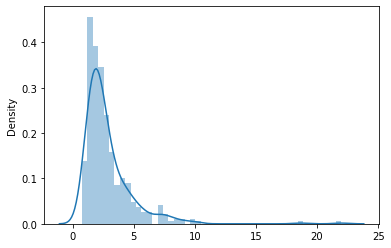

In [36]:
import seaborn as sns

sns.distplot(pd.DataFrame(X_train[:,12]))
plt.show()

In [37]:
# making data more Gaussian-like
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(standardize=True)
X_train_sc3 = scaler.fit(X_train).transform(X_train)

C:\Users\zyunhyeok\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


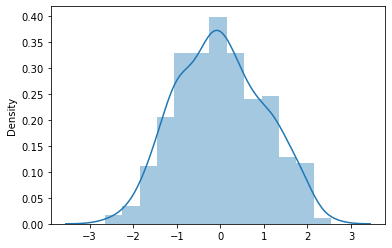

In [38]:
sns.distplot(pd.DataFrame(X_train_sc3[:,12]))
plt.show()

In [39]:
X_test_sc3 = scaler.transform(X_test) 
svm.fit(X_train_sc3, y_train).score(X_test_sc3, y_test)

0.986013986013986

<font color='blue'><p>
Feature Scaling에 대해 더 많은 내용을 알고 싶으면 아래 자료를 참조:  
- [All about Feature Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

## 4. Feature Selection ###

### Model based feature selection #####

- bagging(data만 달라짐) : 모델을 여러개 만들어놓고 앙상블하는 방법 + feature random selection(피처자체도 다르게) -> randomforest

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # SelectFromModel를 사용하려면 트리기반모델 필요

select1 = SelectFromModel(RandomForestClassifier(random_state=0), threshold=None)

In [41]:
X_train_sc3_fs1 = select1.fit(X_train_sc3, y_train).transform(X_train_sc3)

print("X_train_sc3.shape: {}, X_train_sc3_fs1.shape: {}".format(X_train_sc3.shape, X_train_sc3_fs1.shape))

X_train_sc3.shape: (426, 30), X_train_sc3_fs1.shape: (426, 10)


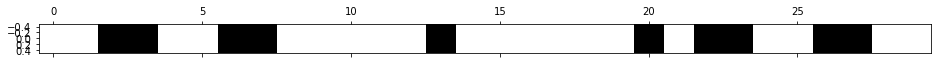

In [42]:
mask = select1.get_support()
# get_support 메서드는 선택된 특성을 불리언 값으로 표시 -> 어떤 특성이 선택되었는지 확인 할 수 있음
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.show()

In [43]:
X_test_sc3_fs1 = select1.transform(X_test_sc3)
svm.fit(X_train_sc3_fs1, y_train).score(X_test_sc3_fs1, y_test)

0.9370629370629371

### Univariate feature selection (단변량->피처하나)

In [44]:
from sklearn.feature_selection import SelectKBest

select2 = SelectKBest(k=10) # 중요하게 생각하는 것을 10개 뽑음
X_train_sc3_fs2 = select2.fit_transform(X_train_sc3, y_train)
X_train_sc3_fs2.shape

(426, 10)

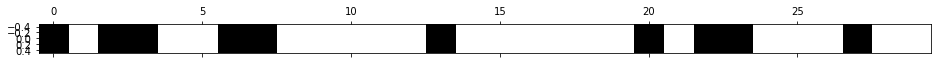

In [45]:
mask = select2.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.show()

In [46]:
X_test_sc3_fs2 = select2.transform(X_test_sc3)
svm.fit(X_train_sc3_fs2, y_train).score(X_test_sc3_fs2, y_test)

0.951048951048951

### Recursive feature elimination (반복하면서 피처를 줄이는 방법)

In [47]:
from sklearn.feature_selection import RFE

select3 = RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=10, step=1)
X_train_sc3_fs3 = select3.fit_transform(X_train_sc3, y_train)
X_train_sc3_fs3.shape

(426, 10)

In [48]:
X_test_sc3_fs3 = select3.transform(X_test_sc3)
svm.fit(X_train_sc3_fs3, y_train).score(X_test_sc3_fs3, y_test)

0.972027972027972

## 5. Feature Generation ###
- 그룹별 summary: Ex) state는 고객이 위치한 36개 주를 나타냄 => 주별로 평균 cost를 계산하여 새로운 feature 생성
- 기존 feature 간의 결합: Ex) 1인당 견적을 계산
- 개별 feature 의 함수적 변환: Ex) np.log, np.sqrt, np.square 등을 사용
- 상호작용과 다항식 추가: 아래 참조

### Automatic generating polynomial and interaction features
입력값  x 를 다항식으로 변환한다.
$$ x →[1,x,x^2,x^3,⋯] $$

만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.
$$ [x_1,x_2]→[1,x_1,x_2,x_1^2,x_1x_2,x_2^2] $$

다음과 같은 파라미터를 가진다.
- degree : 차수
- interaction_only: interaction 항 생성 여부
- include_bias : 상수항 생성 여부

In [49]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(1,7).reshape(3, 2); X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [50]:
poly = PolynomialFeatures(3) # x^3까지 생성
poly.fit_transform(X)

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   9.,  12.,  16.,  27.,  36.,  48.,  64.],
       [  1.,   5.,   6.,  25.,  30.,  36., 125., 150., 180., 216.]])

In [51]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

In [52]:
poly = PolynomialFeatures(interaction_only=True) # 곱한 것만 확인
poly.fit_transform(X)

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  3.,  4., 12.],
       [ 1.,  5.,  6., 30.]])

In [61]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x0 x1']

In [53]:
print(X_train_sc2.shape)

poly = PolynomialFeatures(2, include_bias=False)
X_train_sc3_poly = poly.fit_transform(X_train_sc3)
X_test_sc3_poly = poly.transform(X_test_sc3)
print(X_train_sc3_poly.shape, X_test_sc3_poly.shape)

svm.fit(X_train_sc3_poly, y_train).score(X_test_sc3_poly, y_test)

(426, 30)
(426, 495) (143, 495)


0.9370629370629371

#### feature generation + feature selection (polynomial로 변수생성후 변수선택)

In [54]:
select2 = SelectKBest(k=20)
X_train_sc3_poly_fs2 = select2.fit(X_train_sc3_poly, y_train).transform(X_train_sc3_poly)
X_test_sc3_poly_fs2 = select2.transform(X_test_sc3_poly)
print(X_train_sc3_poly_fs2.shape)

svm.fit(X_train_sc3_poly_fs2, y_train).score(X_test_sc3_poly_fs2, y_test)

(426, 20)


0.993006993006993

- 피처를 최대한 만들고 selection을 하면 성능을 올릴 기회가 많다.

In [55]:
mask = select2.get_support()
np.array(poly.get_feature_names())[mask]

array(['x0', 'x1', 'x2', 'x3', 'x5', 'x6', 'x7', 'x10', 'x12', 'x13',
       'x17', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27',
       'x3 x10'], dtype='<U7')

## Etc.

<font color='blue'><p>
#### Kaggle Competition에서 자주 사용되는 feature 생성방법(아래 pdf 참조)
- https://drive.google.com/open?id=1HDZc1mDvtmpjg9YPpUN0koHeAiqTAHRw
     
<font color='blue'><p>
#### 기타 [Discretization](http://scikit-learn.org/stable/modules/preprocessing.html#discretization)과 [Dimensionality reduction](http://scikit-learn.org/stable/modules/unsupervised_reduction.html) 등도 Feature Engineering에서 자주 사용되는 방법이다.   
#### Automated Feature Engineering  
- Feature Engineering의 자동화는 머신러닝 분야에서 급부상 하고 있는 연구주제
- MIT는 Deep Feature Synthesis라는 알고리즘을 발표 (2015)
    - 온라인 데이터 과학 대회에서 906개 참가팀 중 615개 팀을 이김으로써 그 효과를 입증 
    - [Featuretools](https://www.featuretools.com/)라는 오픈 소스 라이브러리로 제공

<font color="#CC3D3D"><p>
# End